# Naive Bayes - Análise de Sentimento

Para essa atividade vamos gerar uma modelo de análise de sentimento em inglês baseado em reviews retirados de 3 sites: Amazon, IMDb e Yelp. Essa base está disponível [neste link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences). Mais detalhes podem ser encontrados no link ou no artigo de referência: *From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015*. 

A base possui um texto e para cada texto um sentimento sobre o conteúdo abordado no texto. Os sentimentos podem ser positivos (1) ou negativos (2). Foram coletados em média 500 textos para cada sentimento em cada base. 

A atividade consiste em construir uma modelo de aprendizagem para análise de sentimento em inglês. O primeiro passo foi carregar o Dataset de forma apropriada e em seguida construir a matriz de entrada para nosso algoritmo. As etapas do exercício juntamente com o que deve ser feito está descrito a seguir. 

## Carregando o Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df_amazon = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Adolfo/datasets/amazon_cells_labelled.txt", 
                        sep="\t", header=None, names=['Text','Sentiment'])
df_imdb = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Adolfo/datasets/imdb_labelled.txt", 
                        sep="\t", header=None, names=['Text','Sentiment'])
df_yelp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Adolfo/datasets/yelp_labelled.txt", 
                        sep="\t", header=None, names=['Text','Sentiment'])

# df_amazon = pd.read_csv("amazon_cells_labelled.txt", 
#                         sep="\t", header=None, names=['Text','Sentiment'])
# df_imdb = pd.read_csv("imdb_labelled.txt", 
#                         sep="\t", header=None, names=['Text','Sentiment'])
# df_yelp = pd.read_csv("yelp_labelled.txt", 
#                         sep="\t", header=None, names=['Text','Sentiment'])

In [3]:
df_amazon

,Text,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [ ]:
print("Amazon dataset %s" % str(df_amazon.shape))
print("IMDb dataset %s" % str(df_imdb.shape))
print("Yelp dataset %s" % str(df_yelp.shape))

Amazon dataset (1000, 2)
IMDb dataset (748, 2)
Yelp dataset (1000, 2)


In [4]:
join_frames = [df_amazon, df_imdb, df_yelp]

df_final_dataset = pd.concat(join_frames)

df_final_dataset.shape

(2748, 2)

## Construindo a base de dados

A base de dados possui 2748 textos que foram classificados em dois sentimentos: negativo (0) e positivo (1). Construa uma base de dados apropriada para os testes. Divida a base em treino e teste (80% para treino e 20% para teste). A base de treinamento será utilizado para a construção do modelo e a de teste para o teste final do modelo construído. 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final_dataset['Text'], 
                                                    df_final_dataset['Sentiment'], 
                                                    random_state=1,
                                                    test_size=0.2
                                                   )

In [ ]:
print('Number of rows in the total set: {}'.format(df_final_dataset.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 2748
Number of rows in the training set: 2198
Number of rows in the test set: 550


## Construindo o Bag of Words

Construa o Bag of Words para a base de treinamento. Para isso, utilize o método CountVectorizer como mostrado a seguir.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector

CountVectorizer()

O `CountVectorizer` permite construir o array que serve de entrada para os modelos de aprendizagem. O código a seguir, visualiza o array. 

In [7]:
training_data = count_vector.fit_transform(X_train)
training_data.shape

(2198, 4581)

Foi gerada uma matriz de 2198 linhas (os textos) e 4581 colunas (as palavras). Devemos fazer o mesmo com a base de teste. 

In [8]:
testing_data = count_vector.transform(X_test)
testing_data.shape

(550, 4581)

Foi gerada uma matriz com 550 linhas e 4581 colunas também. `training_data` e `testing_data` são as estruturas que devem ser utilizadas no modelo Naive Bayes.

## Atividade 1

Implemente um modelo de Machine Learning para a base gerada. Utilize validação cruzada de 5 folds na base de treinamento e em seguida teste o modelo gerado na base de testes. Reporte as métricas de avaliação estudadas resultante da validação cruzada e da base de testes. Teste pelo menos 3 algoritmos que possuem no `scikit-learn`. 

### Atividade 2

Além dos parâmetros do algoritmos em si, podemos ajustar parâmetros do pré-processamento. Quando utilizamos a classe `CountVectorizer` podemos utilizar uma série de técnicas de pré-processamento para melhorar os dados de entrada do modelo. 

Pesquise sobre o `CountVectorizer` e modifique os parâmetros `default` para gerar dados melhores e, consequentemente, um modelo melhor do que o construído na Atividade 1. Reporte seus resultados na validação cruzada e nos testes. Reavalie os algoritmos e parâmetros testados na etapa 1 para verificar o que muda ao mudar a vetorização.

In [ ]:
# Insira seu código a partir deste espaço.

In [9]:
# Módulos e funções
from tabulate import tabulate
from sklearn.model_selection import cross_validate

def cross_validate_model(model, value_X, value_y):

    cross_result = cross_validate(model, value_X, value_y, scoring=('accuracy','precision','recall','f1'))

    result_values = [
        cross_result['fit_time'].mean(), 
        cross_result['score_time'].mean(), 
        cross_result['test_accuracy'].mean(), 
        cross_result['test_precision'].mean(), 
        cross_result['test_recall'].mean(), 
        cross_result['test_f1'].mean()
    ]

    return result_values

    

In [10]:
# training_data - Linhas de treino
# testing_data - Linhas de teste

# y_train - Coluna de decisão de treino
# y_test - Coluna de decisão de teste

# Primeiro fazendo na base de treinamento

X = training_data
y = y_train

Xtest = testing_data
ytest = y_test


## KNN Utilizando de 1 a 10 vizinhos como parâmetro

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Base de treino

all_knn_results_train = []

for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    results_ = cross_validate_model(knn, X, y)
    temp_list = [k]
    temp_list.extend(results_)
    all_knn_results_train.append(temp_list)


In [ ]:
# Base de teste

all_knn_results_test = []
# Chega a 62% com 29 
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    results_ = cross_validate_model(knn, Xtest, ytest)
    temp_list = [k]
    temp_list.extend(results_)
    all_knn_results_test.append(temp_list)


In [ ]:
print('                    -- Resultados na base de treino -- \n')
print(tabulate(all_knn_results_train, headers=['k','Tempo Treimo','Tempo Teste','Acurácia','Precisão','Recall','F1']))

print('')

print('                    -- Resultados na base de teste -- \n')
print(tabulate(all_knn_results_test, headers=['k','Tempo Treimo','Tempo Teste','Acurácia','Precisão','Recall','F1']))

                    -- Resultados na base de treino -- 

  k    Tempo Treimo    Tempo Teste    Acurácia    Precisão    Recall        F1
---  --------------  -------------  ----------  ----------  --------  --------
  1      0.00258837      0.0403093    0.661509    0.654845  0.6752    0.664831
  2      0.00203824      0.0396243    0.641036    0.699647  0.487663  0.574616
  3      0.00201812      0.0401506    0.64786     0.635092  0.686184  0.659538
  4      0.0018867       0.0443711    0.648775    0.678389  0.559059  0.611988
  5      0.00192556      0.0442404    0.651053    0.632109  0.714612  0.670086
  6      0.00195379      0.0422031    0.661513    0.675943  0.614867  0.642763
  7      0.00177479      0.0405952    0.654685    0.634615  0.723723  0.675431
  8      0.00171399      0.0425786    0.663786    0.669064  0.641402  0.65403
  9      0.00178671      0.0438653    0.650598    0.625794  0.741121  0.677744

                    -- Resultados na base de teste -- 

  k    Tempo Treim

## Decision Three - 
Utilizado 23 de profundidade na base de treino  
Utilizado 23 de profundidade na base de treino  

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
# Base de treino

all_tree_results_train = []

for depth_ in range(1, 24): 
    tree_ = DecisionTreeClassifier(max_depth=depth_, random_state=42)
    temp_list = [depth_]
    results_ = cross_validate_model(tree_, X, y)
    temp_list.extend(results_)
    all_tree_results_train.append(temp_list)

In [13]:
# Base de teste

all_tree_results_test = []

for depth_ in range(1, 24): 
    tree_ = DecisionTreeClassifier(max_depth=depth_, random_state=42)
    temp_list = [depth_]
    results_ = cross_validate_model(tree_, Xtest, ytest)
    temp_list.extend(results_)
    all_tree_results_test.append(temp_list)

In [14]:
print('                    -- Resultados na base de treino -- \n')
print(tabulate(all_tree_results_train, headers=['Profundidade','Tempo Treimo','Tempo Teste','Acurácia','Precisão','Recall','F1']))

print('')

print('                    -- Resultados na base de teste -- \n')
print(tabulate(all_tree_results_test, headers=['Profundidade','Tempo Treimo','Tempo Teste','Acurácia','Precisão','Recall','F1']))

                    -- Resultados na base de treino -- 

  Profundidade    Tempo Treimo    Tempo Teste    Acurácia    Precisão    Recall        F1
--------------  --------------  -------------  ----------  ----------  --------  --------
             1      0.00990205     0.00564179    0.553698    0.846415  0.286096  0.30604
             2      0.011015       0.00525908    0.557344    0.752441  0.47339   0.42229
             3      0.0125545      0.00525222    0.60146     0.890926  0.226002  0.359567
             4      0.0148223      0.00576134    0.597818    0.880234  0.221415  0.352736
             5      0.017554       0.00825148    0.606461    0.832255  0.288119  0.411407
             6      0.0191747      0.0048058     0.618288    0.834776  0.316472  0.443062
             7      0.02169        0.00539479    0.630576    0.84007   0.343019  0.470328
             8      0.0212523      0.00462713    0.643762    0.787527  0.415207  0.531769
             9      0.0234722      0.00583901

## SVM

### C variaton

In [15]:
from sklearn.svm import SVC 

In [16]:
# Base de treino

all_svm_results_train = []

for C in [0.01, 0.1, 1, 10, 50]:
    print("C = %f" % C, end=" ")
    svm = SVC(kernel='rbf', C=C, random_state=42)
    temp_list = [C]
    result_ = cross_validate_model(svm, X, y)
    temp_list.extend(result_)
    all_svm_results_train.append(temp_list)



C = 0.010000 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

C = 0.100000 C = 1.000000 C = 10.000000 C = 50.000000 

In [17]:
# Base de teste

all_svm_results_test = []

for C in [0.01, 0.1, 1, 10, 50]:
    print("C = %f" % C, end=" ")
    svm = SVC(kernel='rbf', C=C, random_state=42)
    temp_list = [C]
    result_ = cross_validate_model(svm, Xtest, ytest)
    temp_list.extend(result_)
    all_svm_results_test.append(temp_list)



C = 0.010000 C = 0.100000 C = 1.000000 C = 10.000000 C = 50.000000 

In [18]:
print('                    -- Resultados na base de treino -- \n')
print(tabulate(all_svm_results_train, headers=['C','Tempo Treimo','Tempo Teste','Acurácia','Precisão','Recall','F1']))

print('')

print('                    -- Resultados na base de teste -- \n')
print(tabulate(all_svm_results_test, headers=['C','Tempo Treimo','Tempo Teste','Acurácia','Precisão','Recall','F1']))

                    -- Resultados na base de treino -- 

    C    Tempo Treimo    Tempo Teste    Acurácia    Precisão    Recall        F1
-----  --------------  -------------  ----------  ----------  --------  --------
 0.01        0.889558      0.191367     0.50273     0         0         0
 0.1         0.415244      0.0992481    0.63558     0.801053  0.36316   0.493175
 1           0.388174      0.0869231    0.769345    0.807021  0.707205  0.753246
10           0.451472      0.0775175    0.815756    0.819856  0.806979  0.813254
50           0.453449      0.077407     0.808025    0.809699  0.803322  0.806208

                    -- Resultados na base de teste -- 

    C    Tempo Treimo    Tempo Teste    Acurácia    Precisão    Recall        F1
-----  --------------  -------------  ----------  ----------  --------  --------
 0.01       0.0265227     0.00934982    0.532727    0.532727  1         0.695125
 0.1        0.0271017     0.00968084    0.532727    0.532727  1         0.695125
 1

### Gamma variation

O `gamma` vai variar com os valores `[0.001, 0.01, 0.1, 1, 10, 100, 1000]`

In [19]:
# Base de treino

all_svm_results_train = []

for gamma in [0.001, 0.01, 0.1, 1]:
    print("Gamma = %.3f" % gamma, end=" ")
    svm = SVC(kernel='rbf', C=10, gamma=gamma, random_state=42)
    temp_list = [gamma]
    result_ = cross_validate_model(svm, X, y)
    temp_list.extend(result_)
    all_svm_results_train.append(temp_list)



Gamma = 0.001 Gamma = 0.010 Gamma = 0.100 Gamma = 1.000 

In [20]:
# Base de teste

all_svm_results_test = []

for gamma in [0.001, 0.01, 0.1, 1]:
    print("Gamma = %.3f" % gamma, end=" ")
    svm = SVC(kernel='rbf', C=10, gamma=gamma, random_state=42)
    temp_list = [gamma]
    result_ = cross_validate_model(svm, X, y)
    temp_list.extend(result_)
    all_svm_results_test.append(temp_list)

Gamma = 0.001 Gamma = 0.010 Gamma = 0.100 Gamma = 1.000 

In [21]:
print('                    -- Resultados na base de treino -- \n')
print(tabulate(all_svm_results_train, headers=['C','Tempo Treimo','Tempo Teste','Acurácia','Precisão','Recall','F1']))
print('')

print('                    -- Resultados na base de teste -- \n')
print(tabulate(all_svm_results_test, headers=['C','Tempo Treimo','Tempo Teste','Acurácia','Precisão','Recall','F1']))

                    -- Resultados na base de treino -- 

    C    Tempo Treimo    Tempo Teste    Acurácia    Precisão    Recall        F1
-----  --------------  -------------  ----------  ----------  --------  --------
0.001        0.373139      0.0888025    0.72795     0.78134   0.633099  0.696827
0.01         0.350264      0.0737303    0.811661    0.826492  0.786854  0.806076
0.1          0.480369      0.0943789    0.804378    0.828771  0.765791  0.795613
1            0.450036      0.103672     0.583714    0.809659  0.213183  0.337019

                    -- Resultados na base de teste -- 

    C    Tempo Treimo    Tempo Teste    Acurácia    Precisão    Recall        F1
-----  --------------  -------------  ----------  ----------  --------  --------
0.001        0.384014      0.0938029    0.72795     0.78134   0.633099  0.696827
0.01         0.353685      0.0754576    0.811661    0.826492  0.786854  0.806076
0.1          0.459044      0.0977541    0.804378    0.828771  0.765791  0.79

* usando C=1000  

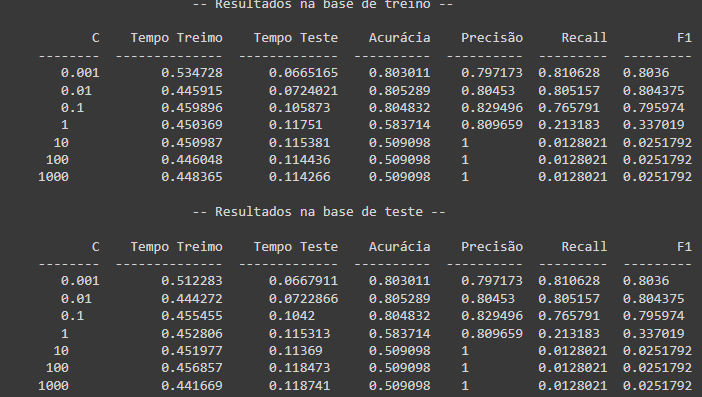

## Random Florest
Utilizando 10,20,50,80,100 árvores

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Base de treino

all_rforests_results_train =[]

for three in [10,20,50,80,100]:
  model = RandomForestClassifier(n_estimators=three, max_features="auto", random_state=16).fit(X, y)
  temp_list = [three]
  result_ = cross_validate_model(model, X, y)
  temp_list.extend(result_)
  all_rforests_results_train.append(temp_list)
  print(f'Com {three} árvores, concluído!')

Com 10 árvores, concluído!
Com 20 árvores, concluído!
Com 50 árvores, concluído!
Com 80 árvores, concluído!
Com 100 árvores, concluído!


In [ ]:
# Base de teste

all_rforests_results_test =[]

for three in [10,20,50,80,100]:
  model = RandomForestClassifier(n_estimators=three, max_features="auto", random_state=16).fit(Xtest, ytest)
  temp_list = [three]
  result_ = cross_validate_model(model, X, y)
  temp_list.extend(result_)
  all_rforests_results_test.append(temp_list)
  print(f'Com {three} árvores, concluído!')

Com 10 árvores, concluído!
Com 20 árvores, concluído!
Com 50 árvores, concluído!
Com 80 árvores, concluído!
Com 100 árvores, concluído!


In [ ]:
print('                    -- Resultados na base de treino -- \n')
print(tabulate(all_rforests_results_train, headers=['N Árvores','Tempo Treimo','Tempo Teste','Acurácia','Precisão','Recall','F1']))
print('')

print('                    -- Resultados na base de teste -- \n')
print(tabulate(all_rforests_results_test, headers=['N Árvores','Tempo Treimo','Tempo Teste','Acurácia','Precisão','Recall','F1']))

                    -- Resultados na base de treino -- 

  N Árvores    Tempo Treimo    Tempo Teste    Acurácia    Precisão    Recall        F1
-----------  --------------  -------------  ----------  ----------  --------  --------
         10        0.158547     0.00804749    0.753881    0.778615  0.705459  0.739962
         20        0.311648     0.0112628     0.777989    0.798219  0.741083  0.768504
         50        0.771618     0.0211677     0.796645    0.809169  0.774027  0.791112
         80        1.21066      0.0307466     0.799379    0.810086  0.780441  0.794522
        100        1.52962      0.0407655     0.799376    0.812837  0.77587   0.79351

                    -- Resultados na base de teste -- 

  N Árvores    Tempo Treimo    Tempo Teste    Acurácia    Precisão    Recall        F1
-----------  --------------  -------------  ----------  ----------  --------  --------
         10        0.15581      0.00765934    0.753881    0.778615  0.705459  0.739962
         20      